In [1]:
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt

In [34]:
FD = 22050
N = 2000
pure_sig = array([6.0 * sin(2.0 * pi * 440.0 * t / FD) for t in range(N)])
noise = uniform(-50.0, 50.0, N)
sig = pure_sig + noise + 2.0
spectrum = rfft(sig)

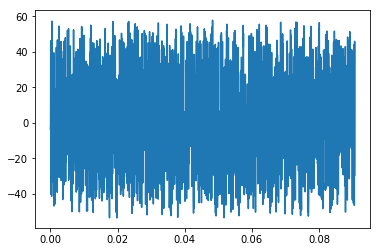

In [7]:
plt.plot(arange(N)/float(FD), sig);

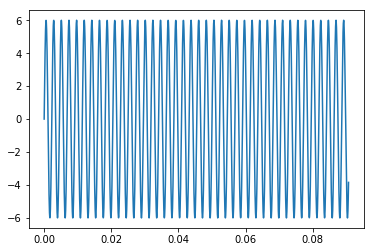

In [6]:
plt.plot(arange(N)/float(FD), pure_sig);

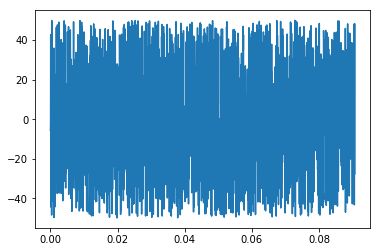

In [8]:
plt.plot(arange(N)/float(FD), noise)

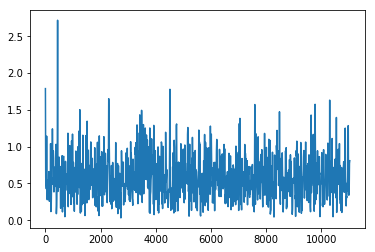

In [10]:
plt.plot(rfftfreq(N, 1./FD), np_abs(spectrum)/N);

In [14]:
freq = rfftfreq(N, 1.0/FD)
freq

array([    0.   ,    11.025,    22.05 , ..., 11002.95 , 11013.975,
       11025.   ])

In [15]:
spectrum

array([3579.66970382   +0.j        ,  494.91359948-1056.98165574j,
       -598.8592589  +780.36186615j, ..., -723.13163613 -230.73066322j,
       1546.27261787  +27.15846544j, 1619.03274303   +0.j        ])

In [18]:
def bandpass_ifft(X, Low_cutoff, High_cutoff, F_sample, M=None):    
    import scipy, numpy
    if M == None: # if the number of points for FFT is not specified
        M = X.size # let M be the length of the time series
    Spectrum = scipy.fft(X, n=M) 
    [Low_cutoff, High_cutoff, F_sample] = map(float, [Low_cutoff, High_cutoff, F_sample])
    
    #Convert cutoff frequencies into points on spectrum
    [Low_point, High_point] = map(lambda F: F/F_sample * M /2, [Low_cutoff, High_cutoff])# the division by 2 is because the spectrum is symmetric 

    Filtered_spectrum = [Spectrum[i] if i >= Low_point and i <= High_point else 0.0 for i in range(M)] # Filtering
    Filtered_signal = scipy.ifft(Filtered_spectrum, n=M)  # Construct filtered signal 
    return Spectrum, Filtered_spectrum, Filtered_signal, Low_point, High_point

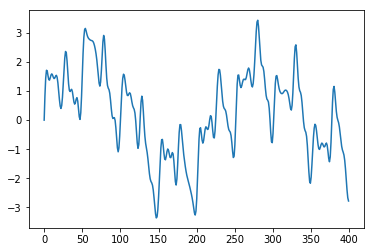

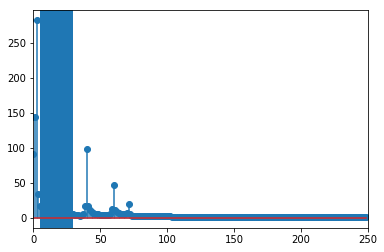

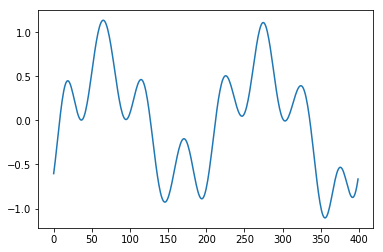

In [26]:
import numpy
N = 400 # signal length of number
x = numpy.arange(0, N, 1) # generate the time ticks
Sines = [numpy.sin(x*n)*(1-n) for n in [.9, .75, .5, .25, .12, .03, 0.025]]# different frequency components
y = numpy.sum(Sines, axis=0)   # add them by column, low frequencies have higher amplitudes

import matplotlib.pyplot as plt
plt.plot(x, y) # visualize the data
Low_cutoff, High_cutoff, F_sample = 5, 30, 500
Spectrum, Filtered_spectrum, Filtered_signal, Low_point, High_point = bandpass_ifft(y, Low_cutoff, High_cutoff, F_sample)

# Below is visualization
fig1 = plt.figure()
plt.stem(numpy.fft.fftfreq(N)*F_sample, abs(Spectrum))
plt.axis([0, F_sample/2, None, None]) # since the signal is real, the spectrum is symmetric|
plt.axvspan(Low_cutoff, High_cutoff) # The frequencies that we wanna get rid of

fig2 = plt.figure()
plt.plot(x, Filtered_signal)

In [74]:
Spectrum, Filtered_spectrum, Filtered_signal, Low_point, High_point = bandpass_ifft(sig, 80, 80, N)

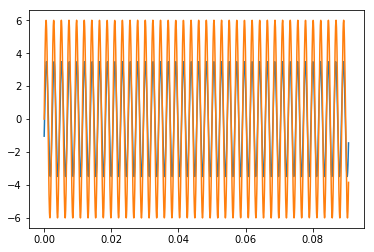

In [75]:
plt.plot(arange(N)/float(FD), Filtered_signal);
plt.plot(arange(N)/float(FD), pure_sig);